<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Classification Metrics
              
</p>
</div>

DS-NTL-010824
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

# Objectives
- Calculate and interpret a confusion matrix
- Calculate and interpret classification metrics such as accuracy, recall, and precision
- Choose classification metrics appropriate to a business problem

In [1]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Many classification metrics for evaluating model validation/test set performance:

- Changes which model you will pick during hyperparameter tuning.


Choice of evaluation metric:
- Major impact on how well model serves its intended goals.

#### Scenario: Identifying Fraudulent Credit Card Transactions
<center><img src = "Images/credit_card.png" width = 400/></center>

In [2]:
credit_data = pd.read_csv('data/credit_fraud_small.csv')

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

The dataset contains a bunch of features:
- The transaction amount
- The relative time of the transaction
- V1-V28 are relevant features: product of feature engineering.

Fraud transaction algorithms:
- Typically huge number of features 
- Can create small combination of features that encompass most variation in the full feature set:
    - Principal component analysis (PCA)
    - V1-V28 are these combination features


Target 'Class':
- 1 if the transaction was fraudulent
- 0 otherwise

In [4]:
credit_data['Class'].unique()

array([0, 1])

In [5]:
credit_data['Class'].value_counts()

Class
0    9962
1      38
Name: count, dtype: int64

What have we just learned about our target in our dataset?

Run a logistic regression on the credit card fraud data:

In [6]:
# Separate data into feature and target DataFrames
X = credit_data.drop('Class', axis = 1)
y = credit_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
cred_scaler = StandardScaler()
cred_scaler.fit(X_train)
X_train_sc = cred_scaler.transform(X_train)
X_test_sc = cred_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
cred_model = LogisticRegression(random_state=42)
cred_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

## Evaluation

Remember:
- .score(X,y) gets the accuracy of our classification model on predicting y given X.

In [7]:
cred_model.score(X_test_sc, y_test)

0.9988

We got 99.88% accuracy! 
- Our model is good. Right?

Think again.

**Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$

- Fraction of correct classifications.
- What the `.score()` method calculates.

**Class 1 (Fraud) = Our positive class**

- TP: True positive
- FP: False positive
- TN: True negative
- FN: False negative

<img src='images/precisionrecall.png' width=70%/>

Easy way to unpack the TP, TN, FP, FN is using the confusion matrix.

In [8]:
from sklearn.metrics import confusion_matrix 

#nice function to visualize confusion matrix
#from sklearn.metrics import plot_confusion_matrix #depreciated
from sklearn.metrics import ConfusionMatrixDisplay


In [9]:
# get predictions
y_pred = cred_model.predict(X_test_sc) 
# calculate confusion matrix
cfmat = confusion_matrix(y_test, y_pred) 

cfmat

array([[2493,    0],
       [   3,    4]])

Notice the way that sklearn displays its confusion matrix: The rows are \['actually false', 'actually true'\]; the columns are \['predicted false', 'predicted true'\].

So it displays:

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$

In [10]:
tn, fp, fn, tp = cfmat.flatten()
print(tn,fp,fn,tp)

print(cfmat)

2493 0 3 4
[[2493    0]
 [   3    4]]


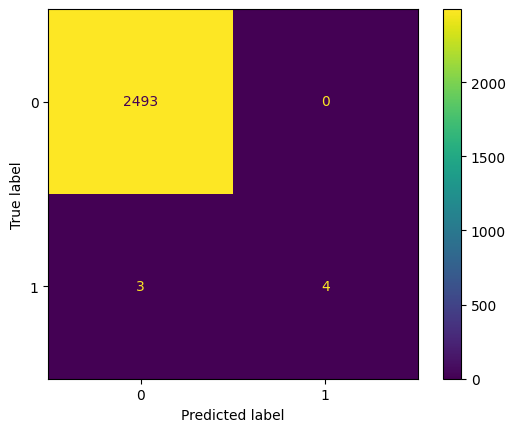

In [11]:
#plot_confusion_matrix(cred_model,X_test_sc, y_test)
#plt.show()
ConfusionMatrixDisplay.from_estimator(cred_model, 
                      X_test_sc, y_test);

**Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$

**Precision:** Accuracy of positive and negative predictions.

In words: How often did my model correctly identify transactions (fraudulent or not fraudulent)? This should give us the same value as we got from the `.score()` method.

In [12]:
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)

0.9988


In [13]:
cred_model.score(X_test_sc, y_test)

0.9988

My accuracy is great. But is our model doing well?

## True positive:

In [14]:
# true positives
tp

4

In [15]:
# false positives
fp

0

Model not doing well on fraud detection.

But the accuracy is great. What happened?

#### Accuracy is not a great metric when:
- There's a class imbalance
- When we care about the positive detections rate for *each* given class.

#### A better metric (for this case)

**Precision** = $\frac{TP}{TP + FP}$

**Precision:** Accuracy of positive predictions.

In this case: 
- Of the model's prediction of 'fraudulent', how many of those predictions were correct?

In [16]:
from sklearn.metrics import precision_score

In [17]:
prec = tp/(tp+fp)
prec

1.0

In [18]:
precision_score(y_test, y_pred)

1.0

In the given task of detecting credit card fraud:
    
Is precision something that the credit card company cares a lot about?

#### Another metric that could be important

**Recall** = **Sensitivity** = $\frac{TP}{TP + FN}$

**Recall:** Fraction of positives that were correctly identified.



Of the actual fraudulent transactions in our data, how many did our model predict as fraudulent?

In [19]:
from sklearn.metrics import recall_score

In [20]:
rec = tp / (tp + fn)
print(rec)

0.5714285714285714


In [21]:
recall_score(y_test, y_pred)

0.5714285714285714

In this task, is recall an important metric? Why or why not?

#### A metric balancing both recall and precision

In [22]:
from sklearn.metrics import f1_score

An $F$-score is a combination of precision and recall, which can be useful when both are important. 

The $F_1$ score is an equal balance of the two using a [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean).

$$F_1 = 2 \frac{Precision \cdot Recall}{Precision + Recall} = \\ \frac{2TP}{2TP + FP + FN}$$

In [23]:
f1_sc = 2*prec*rec / (prec + rec)
print(f1_sc)

0.7272727272727273


In [24]:
f1_score(y_pred, y_test)

0.7272727272727273


**F1 Score Interpretation**

0.9	Very good

0.8 - 0.9 Good

0.5 - 0.8 OK

0.5	Not good

Which of these metrics do you think a credit card company would care most about when trying to flag fraudulent transactions to deny?

#### `classification_report()`


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2493
           1       1.00      0.57      0.73         7

    accuracy                           1.00      2500
   macro avg       1.00      0.79      0.86      2500
weighted avg       1.00      1.00      1.00      2500



- The top rows show statistics for if you treated each label as the "positive" class
- **Support** shows the sample size in each class
- The averages in the bottom two rows are across the rows in the class table above (useful when there are more than two classes)

## Another example: Breast Cancer Prediction

In [27]:
from sklearn.datasets import load_breast_cancer

Load the data and train/test split

In [28]:
# Load the data
cancer_data_dict = load_breast_cancer()
X_cancer = cancer_data_dict['data']
cancer_feature_names = cancer_data_dict['feature_names']

cancer_features = pd.DataFrame(X_cancer, columns = cancer_feature_names)
cancer_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
y_cancer = cancer_data_dict['target']
cancer_data_dict['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [30]:
pd.DataFrame(cancer_data_dict['target']).value_counts()

1    357
0    212
Name: count, dtype: int64

 - 0 = Malignant
 - 1 = Benign

In [31]:
# Split into train and test
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(cancer_features, y_cancer,random_state=42)

Standard scale and fit the model

In [32]:
# Scale the data
bc_scaler = StandardScaler()
bc_scaler.fit(X_train_bc)
X_train_sc = bc_scaler.transform(X_train_bc)
X_test_sc = bc_scaler.transform(X_test_bc)

# Run the model
bc_model = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)
bc_model.fit(X_train_sc, y_train_bc)

LogisticRegression(random_state=42)

## Predict on the test set

In [33]:
y_pred = bc_model.predict(X_test_sc)

Calculate the following for this model:
(scikit-learn's functions for this)

- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

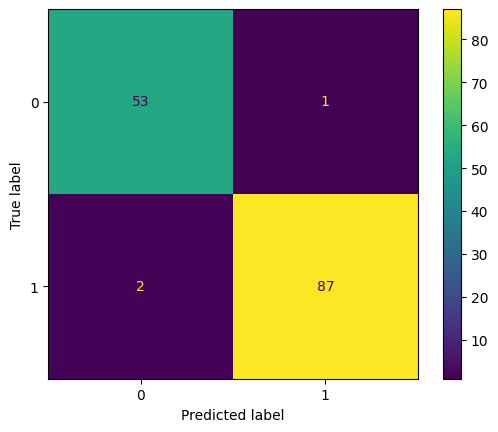

In [34]:
confusion_matrix(y_test_bc, y_pred)

#plot_confusion_matrix(bc_model, X_test_sc, y_test_bc);
ConfusionMatrixDisplay.from_estimator(bc_model, X_test_sc, y_test_bc);

In [35]:
print(bc_model.score(X_test_sc, y_test_bc))
print(precision_score(y_test_bc, y_pred))
print(recall_score(y_test_bc, y_pred))

0.9790209790209791
0.9886363636363636
0.9775280898876404


In [36]:
print(classification_report(y_test_bc, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Which of these metrics matter for this breast cancer detection problem?

#### Which metric to tune model hyperparameters with?

- Accuracy: misleading under class imbalance
    - Sometimes just fine.
- Precision: when false positives are much worse than false negatives
    - DNA crime-scene forensics.
- Recall: when false negatives are a lot worse 
    - X-ray imaging for cancer prediction.  

#### Multiclass Classification


**Multiclass classification**: more than two possible values for the target. An example:

- Classifying iris sub-species based on petal/sepal characteristics.

<center><img src = "Images/iris-dataset.png" width = 500 /></center>

Same metrics/methods to evaluate our models:
- Confusion matrices: number of rows/columns equal to the number of classes. 

- Metrics (precision/recall):
    - choose one class to be the "positive" class.
    - rest are assigned to the "negative" class. 
    - compute precision/recall for given "positive" class.

Repeat for each class.

In [37]:
from sklearn.datasets import load_iris

In [38]:
data_dict = load_iris()
X = data_dict['data']
features = pd.DataFrame(X, columns = data_dict['feature_names'])
#print(flowers.DESCR)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
y = data_dict['target']
data_dict['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 0 = setosa
- 1 = versicolor
- 2 = virginica

In [40]:
# train-test split 
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features, y, test_size = 0.3, random_state =42)

In [41]:
# Scale and transform
iris_scaler = StandardScaler()
X_train_iris_sc = iris_scaler.fit_transform(X_train_iris)
X_test_iris_sc = iris_scaler.transform(X_test_iris)

In [42]:
# fit model and get predictions
iris_model = LogisticRegression(max_iter = 10000)
iris_model.fit(X_train_iris_sc, y_train_iris)
y_pred_iris = iris_model.predict(X_test_iris_sc)

Our confusion matrix for the multiclass iris problem.

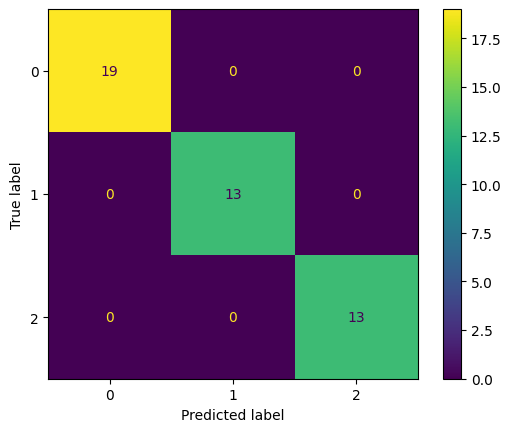

In [43]:
#plot_confusion_matrix(iris_model, X_test_iris_sc,y_test_iris);
ConfusionMatrixDisplay.from_estimator(iris_model, X_test_iris_sc, 
                      y_test_iris);


In [44]:
print(classification_report(y_pred_iris, y_test_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Some issues with assessing the quality of a model solely on these metrics:
- Need to think a little bit more carefully about probabilities and classification thresholds
- The reciever operation curve (up next)

# Summary: Which Metric Should I Care About?


Well, it depends.

Accuracy:
- Pro: Takes into account both false positives and false negatives.
- Con: Can be misleadingly high when there is a significant class imbalance. (A lottery-ticket predictor that *always* predicts a loser will be highly accurate.)

Recall:
- Pro: Highly sensitive to false negatives.
- Con: No sensitivity to false positives.

Precision:
- Pro: Highly sensitive to false positives.
- Con: No sensitivity to false negatives.

F-1 Score:
- Harmonic mean of recall and precision.

The nature of your business problem will help you determine which metric matters.

Sometimes false positives are much worse than false negatives: Arguably, a model that compares a sample of crime-scene DNA with the DNA in a city's database of its citizens presents one such case. Here a false positive would mean falsely identifying someone as having been present at a crime scene, whereas a false negative would mean only that we fail to identify someone who really was present at the crime scene as such.

On the other hand, consider a model that inputs X-ray images and predicts the presence of cancer. Here false negatives are surely worse than false positives: A false positive means only that someone without cancer is misdiagnosed as having it, while a false negative means that someone with cancer is misdiagnosed as *not* having it.